## Psi Chi R - July 2025

https://osf.io/wxmzk/wiki/home/

Level 1: Preparing the data

• Remove participants who are missing ‘Age’ and ‘BPM’

Level 2: Data inspection

• Identify participants with values considered outliers for ‘BPM’.

a. Test your skills: Visualize outlier values for ‘BPM’.

• Is BPM skewed? If so, how?

• Identify participants with values considered outliers for ‘hourslistened’

• Remove participants with values considered outliers on ‘BPM’ and ‘hourslistened’

Level 2: Descriptives

• Find the mean, standard deviation, median, and range of ‘hourslistened’

a. Test your skills: Find the mean, standard deviation, median, and range of ‘hourslistened’ in one step.

Level 3: Inferential + Other Statistics

• Is there a statistically significant correlation between the number of hours someone listened to EDM and their depression score?

• Is there a significant relationship between the frequency of listening to metal music and the mental health effects of listening to music?

Test your skills: Is there a statistically significant difference in anxiety scores between people who listen to Jazz ‘very frequently’ and ‘never?’

Test your skills: Is there a statistically significant difference in Insomnia scores between people whose favorite genre is “pop” and people whose favorite genre is “rap?”

Level 4: Visualization

• Graph the relationship between the number of hours someone listens to music and their OCD score

## Load packages

In [ ]:
rm(list=ls())

In [20]:

## sum rows
sum_rows = function(x) {
  x = as.data.frame(x)
  sums = sapply(x,function(col) if (is.numeric(col)) sum(col, na.rm = T) else NA)
  sums = as.data.frame(t(sums))
  names(sums) = names(x)
  rbind(x, sums)
}

## right column for total
sum_cols = function(x) {
  x$Total = rowSums(x[sapply(x, is.numeric)], na.rm = T)
  x
}

#dollar format function
dollars = function(x) {
  paste0("$",format(x,big.mark= ",",scientific=F))
}

desc_stats = function(x){
  c(min = min(x,na.rm=T),
    median = median(x,na.rm=T),
    max = max(x,na.rm=T),
    mean = mean(x,na.rm=T),
    sd = sd(x,na.rm=T))
}

#numeric notations
options(scipen=9999)

library(tidyverse)
#library(readxl)

In [3]:
sheet_URL = "https://osf.io/download/edn8q/"

download.file(sheet_URL, destfile = "data.csv")

data = read.csv("data.csv")

In [8]:
data |> head()
tail(data)

,timestamp,age,primary.streaming.service,hourslistened,while.working,instrumentalist,composer,fav.genre,exploratory,foreign.languages,⋯,frequency..pop.,frequency..r.b.,frequency..rap.,frequency..rock.,frequency..video.game.music.,anxiety,depression,insomnia,ocd,music.effects
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,8/27/2022 19:29,18,Spotify,3.0,Yes,Yes,Yes,Latin,Yes,Yes,⋯,Very frequently,Sometimes,Very frequently,Never,Sometimes,3,0,1,0,
2,8/27/2022 19:57,63,Pandora,1.5,Yes,No,No,Rock,Yes,No,⋯,Sometimes,Sometimes,Rarely,Very frequently,Rarely,7,2,2,1,
3,8/27/2022 21:28,18,Spotify,4.0,No,No,No,Video game music,No,Yes,⋯,Rarely,Never,Rarely,Rarely,Very frequently,7,7,10,2,No effect
4,8/27/2022 21:40,61,YouTube Music,2.5,Yes,No,Yes,Jazz,Yes,Yes,⋯,Sometimes,Sometimes,Never,Never,Never,9,7,3,3,Improve
5,8/27/2022 21:54,18,Spotify,4.0,Yes,No,No,R&B,Yes,No,⋯,Sometimes,Very frequently,Very frequently,Never,Rarely,7,2,5,9,Improve
6,8/27/2022 21:56,18,Spotify,5.0,Yes,Yes,Yes,Jazz,Yes,Yes,⋯,Very frequently,Very frequently,Very frequently,Very frequently,Never,8,8,7,7,Improve


,timestamp,age,primary.streaming.service,hourslistened,while.working,instrumentalist,composer,fav.genre,exploratory,foreign.languages,⋯,frequency..pop.,frequency..r.b.,frequency..rap.,frequency..rock.,frequency..video.game.music.,anxiety,depression,insomnia,ocd,music.effects
,<chr>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
731,10/30/2022 13:15,21,Spotify,2,Yes,No,No,R&B,Yes,Yes,⋯,Sometimes,Very frequently,Sometimes,Sometimes,Sometimes,7,6,4,6,Improve
732,10/30/2022 14:37,17,Spotify,2,Yes,Yes,No,Rock,Yes,Yes,⋯,Very frequently,Never,Rarely,Very frequently,Never,7,6,0,9,Improve
733,11/1/2022 22:26,18,Spotify,1,Yes,Yes,No,Pop,Yes,Yes,⋯,Very frequently,Never,Never,Sometimes,Sometimes,3,2,2,5,Improve
734,11/3/2022 23:24,19,Other streaming service,6,Yes,No,Yes,Rap,Yes,No,⋯,Sometimes,Sometimes,Sometimes,Rarely,Rarely,2,2,2,2,Improve
735,11/4/2022 17:31,19,Spotify,5,Yes,Yes,No,Classical,No,No,⋯,Never,Never,Never,Never,Sometimes,2,3,2,1,Improve
736,11/9/2022 1:55,29,YouTube Music,2,Yes,No,No,Hip hop,Yes,Yes,⋯,Sometimes,Very frequently,Very frequently,Very frequently,Rarely,2,2,2,5,Improve


## Clean and join

In [7]:
names(data) = trimws(str_to_lower(str_replace_all(names(data), " ", "_")))

In [11]:
glimpse(data)

Rows: 736
Columns: 32
$ timestamp                    <chr> "8/27/2022 19:29", "8/27/2022 19:57", "8/…
$ age                          <int> 18, 63, 18, 61, 18, 18, 18, 21, 19, 18, 1…
$ primary.streaming.service    <chr> "Spotify", "Pandora", "Spotify", "YouTube…
$ hourslistened                <dbl> 3.0, 1.5, 4.0, 2.5, 4.0, 5.0, 3.0, 1.0, 6…
$ while.working                <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", …
$ instrumentalist              <chr> "Yes", "No", "No", "No", "No", "Yes", "Ye…
$ composer                     <chr> "Yes", "No", "No", "Yes", "No", "Yes", "N…
$ fav.genre                    <chr> "Latin", "Rock", "Video game music", "Jaz…
$ exploratory                  <chr> "Yes", "Yes", "No", "Yes", "Yes", "Yes", …
$ foreign.languages            <chr> "Yes", "No", "Yes", "Yes", "No", "Yes", "…
$ bpm                          <int> 156, 119, 132, 84, 107, 86, 66, 95, 94, 1…
$ frequency..classical.        <chr> "Rarely", "Sometimes", "Never", "Sometime…
$ frequency..count

## Level 1: Preparing the data
Remove participants who are missing ‘Age’ and ‘BPM’

In [14]:
data1=data |> filter(!is.na(age) & !is.na(bpm))

str(data1)

'data.frame':	629 obs. of  32 variables:
 $ timestamp                   : chr  "8/27/2022 19:29" "8/27/2022 19:57" "8/27/2022 21:28" "8/27/2022 21:40" ...
 $ age                         : int  18 63 18 61 18 18 18 21 19 18 ...
 $ primary.streaming.service   : chr  "Spotify" "Pandora" "Spotify" "YouTube Music" ...
 $ hourslistened               : num  3 1.5 4 2.5 4 5 3 1 6 1 ...
 $ while.working               : chr  "Yes" "Yes" "No" "Yes" ...
 $ instrumentalist             : chr  "Yes" "No" "No" "No" ...
 $ composer                    : chr  "Yes" "No" "No" "Yes" ...
 $ fav.genre                   : chr  "Latin" "Rock" "Video game music" "Jazz" ...
 $ exploratory                 : chr  "Yes" "Yes" "No" "Yes" ...
 $ foreign.languages           : chr  "Yes" "No" "Yes" "Yes" ...
 $ bpm                         : int  156 119 132 84 107 86 66 95 94 155 ...
 $ frequency..classical.       : chr  "Rarely" "Sometimes" "Never" "Sometimes" ...
 $ frequency..country.         : chr  "Never" "Never" 

## Level 2: Data inspection

• Identify participants with values considered outliers for ‘BPM’.

a. Test your skills: Visualize outlier values for ‘BPM’.

• Is BPM skewed? If so, how?

• Identify participants with values considered outliers for ‘hourslistened’

• Remove participants with values considered outliers on ‘BPM’ and ‘hourslistened’

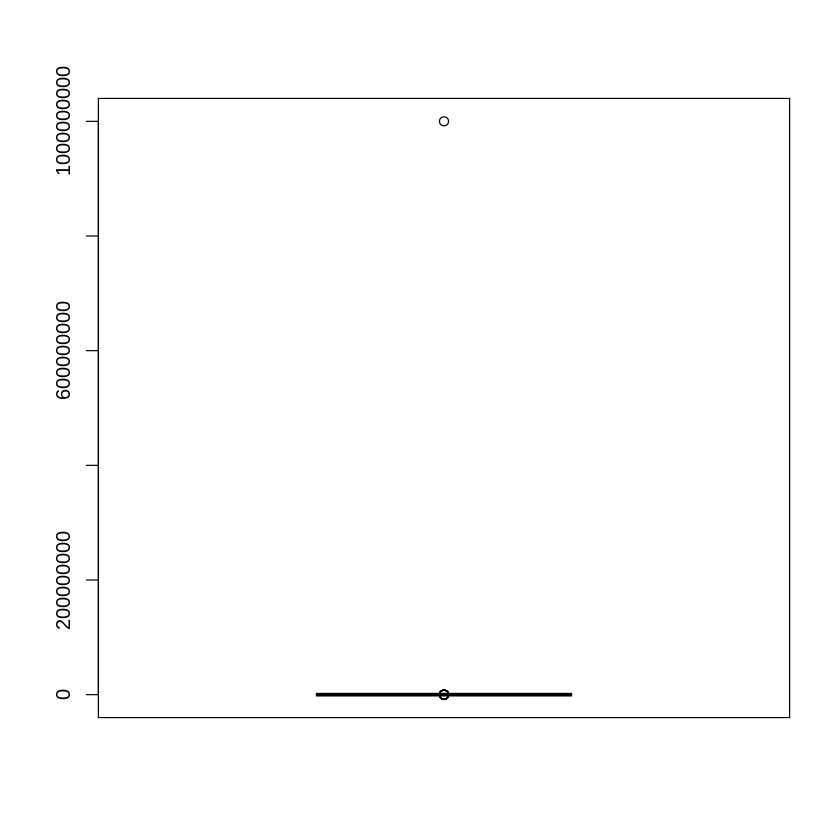

In [21]:
data1$bpm2 = as.numeric(data1$bpm)

boxplot(data1$bpm2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     52     100     120     122     140     194 

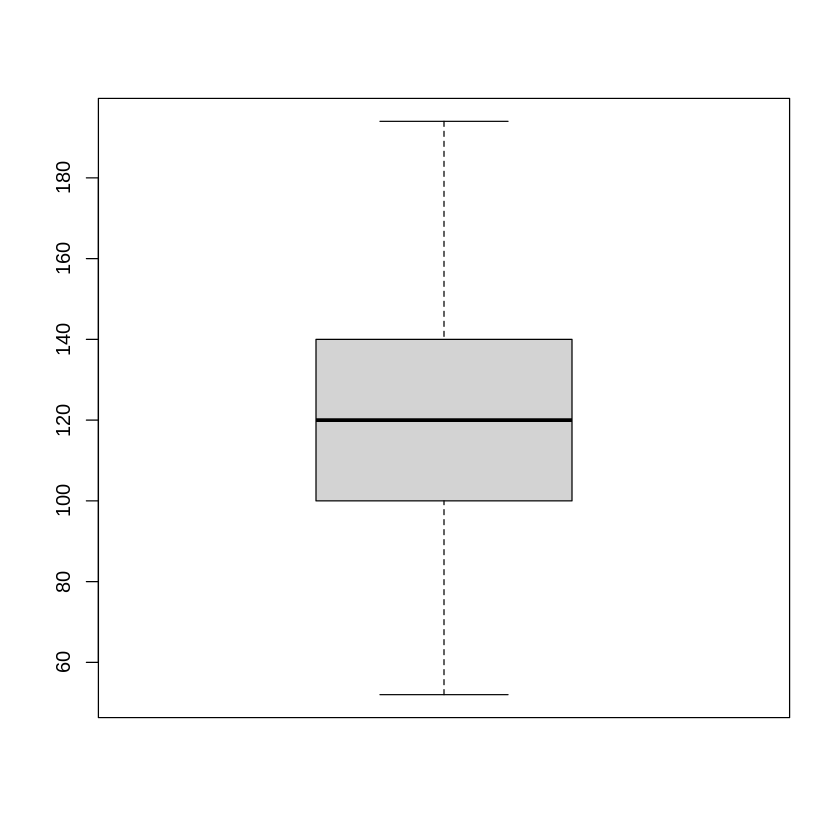

In [30]:
data2 = data1 |> filter(bpm < 200 & bpm > 40)

boxplot(data2$bpm)
summary(data2$bpm)

## Level 2: Descriptives

• Find the mean, standard deviation, median, and range of ‘hourslistened’

a. Test your skills: Find the mean, standard deviation, median, and range of ‘hourslistened’ in one step.

## Plots